In [9]:
from sympy import *
init_printing(use_latex=true)

t,d1,l1,l2 = symbols('t,d_1,l_1,l_2')
t1 = Function('\\theta_1')(t)
t2 = Function('\\theta_2')(t)
d3 = Function('d_3')(t)
x,y,z = symbols('x,y,z')


def dhs(a,alpha,d,theta):
    M = Matrix([[cos(theta),-sin(theta)*cos(alpha),sin(theta)*sin(alpha),a*cos(theta)],
                  [sin(theta),cos(theta)*cos(alpha),-cos(theta)*sin(alpha),a*sin(theta)],
                  [0,sin(alpha),cos(alpha),d],
                  [0,0,0,1]])
    return M

#T1_0 = dh(l1,0,d1,t1)
#T2_1 = dh(l2,0,0,t2)
#T3_2 = dh(0,pi,d3,0)

T3_0 = dhs(l1,0,d1,t1)*dhs(l2,pi,0,t2)*dhs(0,0,d3,0)
xx = simplify(T3_0[0,3])
yy = simplify(T3_0[1,3])
zz = simplify(T3_0[2,3])
zz

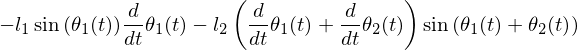

In [12]:
xx.diff(t)

import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numpy import sin,cos,tan,arcsin,arccos,arctan,arctan2,sqrt,pi
%matplotlib notebook

def dh(a,alpha,d,theta):
    M = np.array([[cos(theta),-sin(theta)*cos(alpha),sin(theta)*sin(alpha),a*cos(theta)],
                  [sin(theta),cos(theta)*cos(alpha),-cos(theta)*sin(alpha),a*sin(theta)],
                  [0,sin(alpha),cos(alpha),d],
                  [0,0,0,1]])
    return M

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')

# IK
x,y,z = 1,1.5,0.5
d1,l1,l2 = 2,1,1
K = (x**2 + y**2 - l1**2 - l2**2)/(2*l1*l2)
t2 = arctan2(-sqrt(1-(K**2)), K)
t1 = arctan2(l2*y*cos(t2) + l1*y - l2*x*sin(t2), l2*x*cos(t2) + l1*x + l2*y*sin(t2))
d3 = d1 - z

# FK
T1_0 = dh(l1,0,d1,t1)
T2_1 = dh(l2,pi,0,t2)
T3_2 = dh(0,0,d3,0)
T2_0 = np.dot(T1_0,T2_1)
T3_0 = np.dot(T2_0,T3_2)
O1 = np.array([0,0,d1])
A = np.array([T1_0[0][3],T1_0[1][3],T1_0[2][3]])
B = np.array([T2_0[0][3],T2_0[1][3],T2_0[2][3]])
C = np.array([T3_0[0][3],T3_0[1][3],T3_0[2][3]])
ax.plot([0,O1[0],A[0],B[0],C[0]],[0,O1[1],A[1],B[1],C[1]],[0,O1[2],A[2],B[2],C[2]],'-o',lw=4)
ax.plot([0],[0],[0],'o',markersize=20)
ax.set_xlabel('x'),ax.set_ylabel('y'),ax.set_zlabel('z')
plt.axis('equal');
ax.view_init(20,60)